## Shaiha E K 21ME10075

## Task 1

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

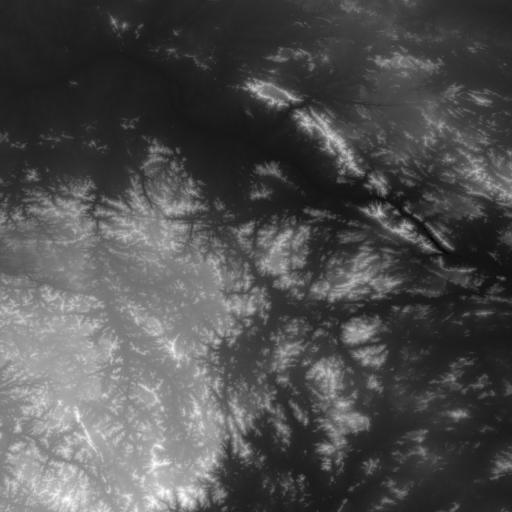

In [4]:
image = Image.open('terrain.jpeg').convert('L')
image

In [5]:
dem_data = np.array(image) #convert image to numpy array
# print(np.max(dem_data), np.min(dem_data))
dem_data = dem_data / 255.0

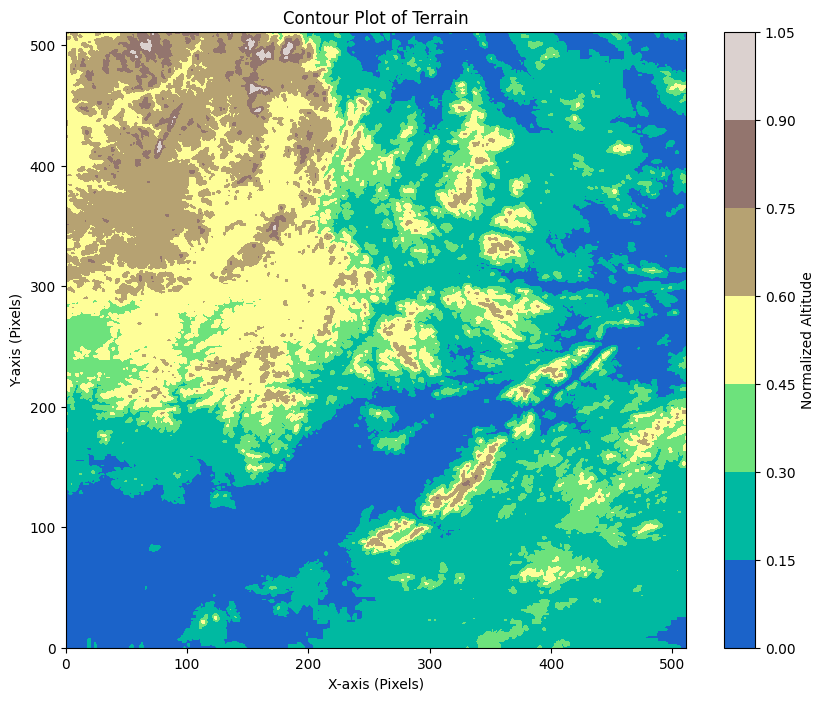

In [6]:
plt.figure(figsize=(10,8))
plt.contourf(dem_data, cmap=plt.cm.terrain)
# plt.contourf(dem_data, cmap='gray', levels=50)
# plt.imshow(dem_data, cmap=plt.cm.terrain)
plt.colorbar(label='Normalized Altitude')
plt.title('Contour Plot of Terrain')
plt.xlabel('X-axis (Pixels)')
plt.ylabel('Y-axis (Pixels)')
plt.show()

In [7]:
def find_catchment(dem_data, x_start, y_start, learning_rate=0.1,tol=1e-3,max_iter=1000):
    x,y = x_start,y_start
    num_rows, num_cols = dem_data.shape
    for i in range(max_iter):
        grad_y, grad_x = np.gradient(dem_data)
        grad_x_value = grad_x[x,y]
        grad_y_value = grad_y[x,y]
        x_new = int(x - learning_rate * grad_x_value)
        y_new = int(y - learning_rate * grad_y_value)

        x_new = np.clip(x_new, 0, num_cols - 1)
        y_new = np.clip(y_new, 0, num_rows - 1)

        if np.abs(x_new - x) < tol and np.abs(y_new - y) < tol:
            break
        x,y = x_new,y_new
    return x,y


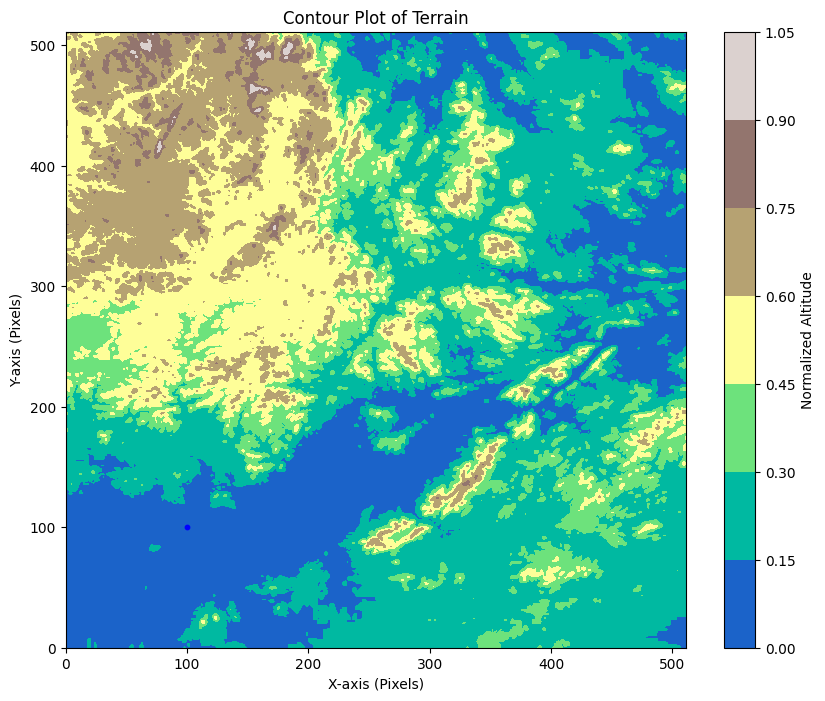

In [8]:
#add the minimum point to the previous plot
plt.figure(figsize=(10,8))
plt.contourf(dem_data, cmap=plt.cm.terrain)
plt.colorbar(label='Normalized Altitude')
plt.title('Contour Plot of Terrain')
plt.xlabel('X-axis (Pixels)')
plt.ylabel('Y-axis (Pixels)')
x_min, y_min = find_catchment(dem_data, 100, 100)
plt.scatter(x_min,y_min, color='blue', s=10, label='Minimum Point') 
plt.show()

In [9]:
n_points = 10000
np.random.seed(42)
points=[] # create an empty list
for i in range(n_points):
    x_start = np.random.randint(0, dem_data.shape[1])
    y_start = np.random.randint(0, dem_data.shape[0])
    x_min, y_min = find_catchment(dem_data, x_start, y_start)
    points.append((x_min, y_min))
points = np.array(points)

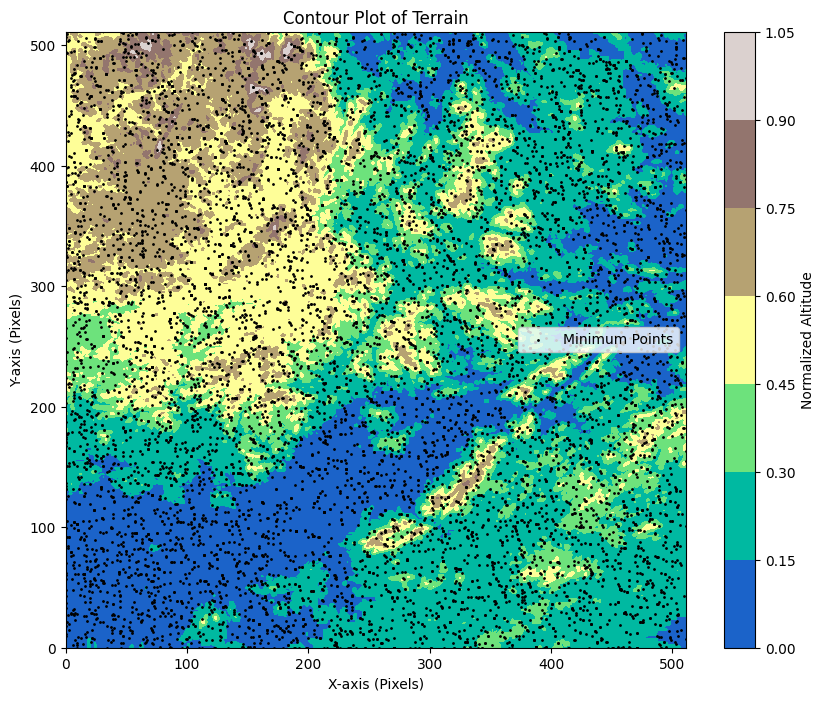

(10000, 2)


In [10]:
plt.figure(figsize=(10, 8))
plt.contourf(dem_data, cmap=plt.cm.terrain)
plt.colorbar(label='Normalized Altitude')
plt.title('Contour Plot of Terrain')
plt.xlabel('X-axis (Pixels)')
plt.ylabel('Y-axis (Pixels)')
plt.scatter(points[:, 0], points[:, 1], color='black',
            s=1, label='Minimum Points')
plt.legend()
plt.show()
print(points.shape)

(10000, 2)


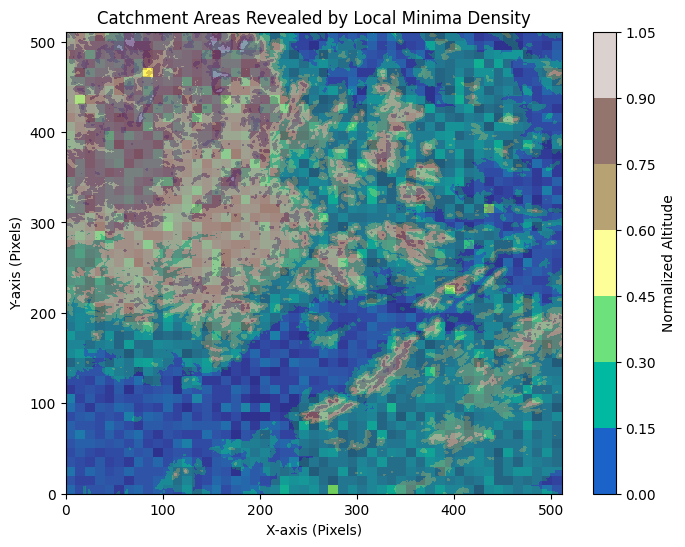

In [16]:

# Task 5: Plotting the catchment area
print(points.shape)
num_rows, num_cols = dem_data.shape
plt.figure(figsize=(8, 6))
plt.contourf(dem_data, cmap= plt.cm.terrain)
plt.colorbar(label='Normalized Altitude')
plt.hist2d(points[:, 0], points[:, 1], bins=[num_cols//10, num_rows//10], alpha=0.5, cmap='viridis')

plt.title('Catchment Areas Revealed by Local Minima Density')
plt.xlabel('X-axis (Pixels)')
plt.ylabel('Y-axis (Pixels)')
plt.show()

In [12]:
from mpl_toolkits.mplot3d import Axes3D

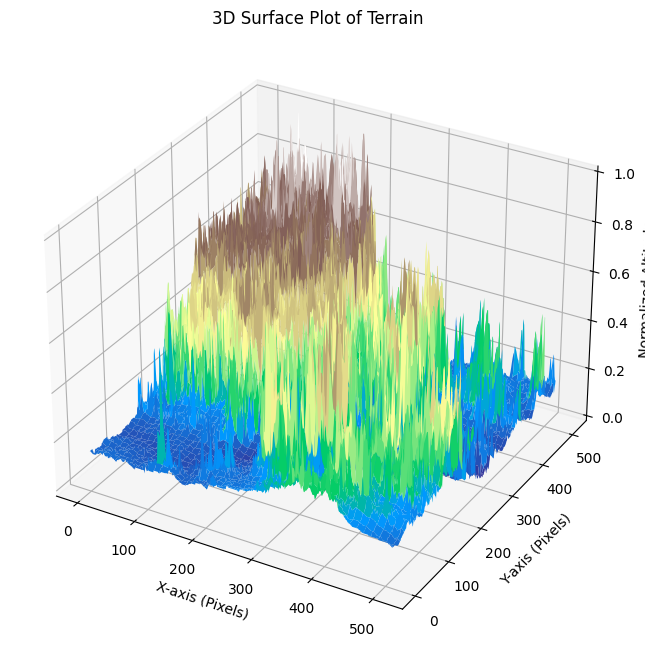

In [17]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create grid for x and y
x = np.arange(0, num_cols)
y = np.arange(0, num_rows)
x, y = np.meshgrid(x, y)

# Plot the surface
ax.plot_surface(x, y, dem_data, cmap='terrain')
ax.set_title('3D Surface Plot of Terrain')
ax.set_xlabel('X-axis (Pixels)')
ax.set_ylabel('Y-axis (Pixels)')
ax.set_zlabel('Normalized Altitude')
plt.show()